# 1. Proyecto Análisis de Violencia en Mexico en el perido 2017-2023
--- 

## **Abstract**


Este DataSet es un registro de incidencia delictiva en México en el periodo de 2015 - 2023. url: https://www.kaggle.com/datasets/beelzabi/crimen-mx


En México y tanto en otros lugares del mundo existe la inseguridad para todas las a gran escala y es importante conocer mediante las estadisticas, el tipo de delito que se estan cometiendo a gran escala, con el fin de que podamos tomar nuestras precauciones y alertar a nuestros familiares.

El presente estudio se enfoca en analizar un conjunto de datos relacionados con los crímenes en México, con el objetivo de identificar patrones y tendencias que puedan ser utilizados para prevenir y reducir su incidencia. Para ello, se utilizaron técnicas de análisis exploratorio de datos y aprendizaje automático, tales como la regresión lineal.

Este estudio puede ser de interés para las autoridades y los cuerpos de seguridad encargados de la prevención y reducción de los crímenes en México, así como para los investigadores y analistas de datos interesados en el estudio de la criminalidad y la violencia en México y otros países.

A quién le puede interesar:

Este estudio puede ser de interés para diversas personas y organizaciones, entre ellas:

- Autoridades y cuerpos de seguridad encargados de la prevención y reducción de los crímenes en México.
- Investigadores y analistas de datos interesados en el estudio de la criminalidad y la violencia en México.
- Organizaciones no gubernamentales y grupos de la sociedad civil dedicados a la defensa de los derechos humanos y la seguridad ciudadana.
- Ciudadanos y comunidades afectados por la violencia y la criminalidad en México, interesados en conocer más sobre las tendencias en su localidad o región.


## **Contexto Comercial**

En la Republica Mexicana ha experimentado un gran numero de reportes de todo tipo de delitos en los ultimos años. Para ello se ha recopilado información de todo los delitos comentidos desde el año 2015 hasta la actualidad 2023.

Somos una equipo de Trabajadores de Data Sicence independiente en el cual nos encomiendan identificar el Estado con mayor inseguidad en el Pais de Mexico y tambien a que genero esta afectando más asi como predecir los crimenes en los futuros años. Se tiene ciertos parametros como el tipo de delitos, el genero afectado, los meses de las cuales se han registrado.


## **Problema Comercial**

Con los datos proporcionados generar visualizaciones que correspondan al objetivo del problema la cual es identificar el estado con mayor inseguridad y de acuerdo a ello hacer una prediccion del incremento de los delitos a futuro, asi como responder a las preguntas del cliente


## **CONTEXTO ANALITICO**

Recibirmos este data set por la comunidad de Kaggle https://www.kaggle.com/datasets/beelzabi/crimen-mx para analizar los detitos cometidos en Mexico.

## Objetivo

El objetivo principal de este proyecto es desarrollar un modelo predictivo para predecir la tasa de delitos por año en un área determinada (El estado con mayor inseguridad). Esto podría ser útil para identificar patrones a largo plazo en la actividad delictiva y para evaluar la efectividad de las políticas públicas y las medidas de seguridad a lo largo del tiempo. Algunas preguntas específicas que buscamos responder son:

- ¿Existe alguna correlación entre los años y el total de homicidios cometidos?
- ¿Cual es el estado de la Republica Mexicana con mayor delitos? 
- ¿Qué variables están disponibles en el conjunto de datos y cuáles son relevantes para la predicción de la tasa de delitos por año?
- ¿Cómo se relacionan las variables predictoras con la tasa de delitos por año?
- ¿Qué técnicas de modelado predictivo son apropiadas para predecir la tasa de delitos por año en el área de interés? 
## Hipótesis


- La tasa de delitos puede estar relacionada con el tamaño de la población en una zona determinada, ya que las zonas con una mayor densidad de población pueden tener una mayor actividad delictiva.
- La tasa de delitos puede estar relacionada con la edad de la población, ya que las zonas con una mayor proporción de jóvenes pueden tener una mayor actividad delictiva.
- Los delitos violentos, como el homicidio, pueden estar relacionados con el tráfico de drogas en una zona determinada, ya que el tráfico de drogas puede estar asociado con la violencia.
- La tasa de homicidios aumenta en el area con mayor inseguridad aumenta año tras año




# 2. Carga de Librerias

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="ticks")
import statsmodels.api as sm
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (20, 10)
plt.style.use('ggplot')
import os
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor


In [2]:
# Leemos el CSV
df = pd.read_csv('Crimen_mx.csv', encoding='utf-8')
df.head()

,Año,Clave_Ent,Entidad,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,Febrero,Marzo,...,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Total delitos,Sexo/Averiguación previa,Rango de edad
0,2015,1,Aguascalientes,La libertad y la seguridad sexual,Delito sexual,Abuso sexual,Abuso sexual,6,4,0.0,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,18,Averiguación previa,No aplica
1,2015,1,Aguascalientes,La libertad y la seguridad sexual,Delito sexual,Acoso sexual,Acoso sexual,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,Averiguación previa,No aplica
2,2015,1,Aguascalientes,La libertad y la seguridad sexual,Delito sexual,Hostigamiento sexual,Hostigamiento sexual,1,1,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,3.0,11,Averiguación previa,No aplica
3,2015,1,Aguascalientes,La libertad y la seguridad sexual,Violación,Violación simple,Violación simple,5,5,3.0,...,15.0,8.0,8.0,6.0,9.0,5.0,6.0,84,Averiguación previa,No aplica
4,2015,1,Aguascalientes,La libertad y la seguridad sexual,Violación,Violación equiparada,Violación equiparada,0,5,3.0,...,4.0,4.0,4.0,3.0,5.0,3.0,0.0,41,Averiguación previa,No aplica


# 3. Análisis Exploratorio de Datos (EDA)



Las variables del conjunto son las siguientes: 

- Año - Año en que ocurrieron los delitos
- Clave_Ent - Clave de la entidad federativa
- Entidad - Estado en el que ocurre el delito
- Bien jurídico afectado - Juridico afectado sobre el dlito
- Tipo de delito - Tipo de delito cometido
- Subtipo de delito - Subtipo de delito cometido
- Modalidad - Forma en que ocurre el Delito
- Enero - Cantidad de delitos ocurridos en Enero
- Febrero - Cantidad de delitos ocurridos en Febrero
- Marzo - Cantidad de delitos ocurridos en Marzo
- Abril - Cantidad de delitos ocurridos en Abril
- Mayo - Cantidad de delitos ocurridos en Mayo
- Junio - Cantidad de delitos ocurridos en Junio
- Julio - Cantidad de delitos ocurridos en Julio
- Agosto - Cantidad de delitos ocurridos en Agosto
- Septiembre - Cantidad de delitos ocurridos en Septiembre
- Octubre - Cantidad de delitos ocurridos en Octubre
- Noviembre - Cantidad de delitos ocurridos en Noviembre
- Diciembre - Cantidad de delitos ocurridos en Diciembre
- Total delitos - Suma de total de Delitos de Enrero-Diciembre
- Sexo/Averiguación previa - Quienes fueron los afectados

## 3.1 Información general sobre el conjunto de datos

In [3]:
# Tamaño del conjunto de datos
print("Filas, columnas: ", df.shape)

# Nombres de las variables
print("\nNombres de las variables: \n", df.columns)

# Tipo de datos de cada variable
print("\nTipos de datos: \n", df.dtypes)

# Verificar la presencia de valores faltantes
print("\nValores faltantes: \n", df.isnull().sum())

# Estadísticas descriptivas de las variables numéricas
print("\nEstadísticas descriptivas: \n", df.describe(include=[np.number]))

# Frecuencia de valores únicos en las variables categóricas
for col in df.select_dtypes(include=['object']).columns:
    print("\nFrecuencia de valores únicos de", col)
    print(df[col].value_counts())

Filas, columnas:  (84096, 22)

Nombres de las variables: 
 Index(['Año', 'Clave_Ent', 'Entidad', 'Bien jurídico afectado',
       'Tipo de delito', 'Subtipo de delito', 'Modalidad', 'Enero', 'Febrero',
       'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre',
       'Octubre', 'Noviembre', 'Diciembre', 'Total delitos',
       'Sexo/Averiguación previa', 'Rango de edad'],
      dtype='object')

Tipos de datos: 
 Año                           int64
Clave_Ent                     int64
Entidad                      object
Bien jurídico afectado       object
Tipo de delito               object
Subtipo de delito            object
Modalidad                    object
Enero                         int64
Febrero                       int64
Marzo                       float64
Abril                       float64
Mayo                        float64
Junio                       float64
Julio                       float64
Agosto                      float64
Septiembre                  

In [4]:
df.isnull()

,Año,Clave_Ent,Entidad,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,Febrero,Marzo,...,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Total delitos,Sexo/Averiguación previa,Rango de edad
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84091,False,False,False,False,False,False,False,False,False,True,...,True,True,True,True,True,True,True,False,False,False
84092,False,False,False,False,False,False,False,False,False,True,...,True,True,True,True,True,True,True,False,False,False
84093,False,False,False,False,False,False,False,False,False,True,...,True,True,True,True,True,True,True,False,False,False
84094,False,False,False,False,False,False,False,False,False,True,...,True,True,True,True,True,True,True,False,False,False


**Conclusiones**
Tenemos un dataset con datos nulos, las cuales se identificaron y son los reguistros del año 2023 que estan incompletos por lo que se toma una desicion de seleccionar solo los regitros desde 2015 hasta Diciembre 2022

## 3.2 Seleccion de Rango de fechas para el dataset

In [5]:
df_select =df.loc[df["Año"].between(2015, 2022)]
df_select

,Año,Clave_Ent,Entidad,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,Febrero,Marzo,...,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Total delitos,Sexo/Averiguación previa,Rango de edad
0,2015,1,Aguascalientes,La libertad y la seguridad sexual,Delito sexual,Abuso sexual,Abuso sexual,6,4,0.0,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,18,Averiguación previa,No aplica
1,2015,1,Aguascalientes,La libertad y la seguridad sexual,Delito sexual,Acoso sexual,Acoso sexual,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,Averiguación previa,No aplica
2,2015,1,Aguascalientes,La libertad y la seguridad sexual,Delito sexual,Hostigamiento sexual,Hostigamiento sexual,1,1,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,3.0,11,Averiguación previa,No aplica
3,2015,1,Aguascalientes,La libertad y la seguridad sexual,Violación,Violación simple,Violación simple,5,5,3.0,...,15.0,8.0,8.0,6.0,9.0,5.0,6.0,84,Averiguación previa,No aplica
4,2015,1,Aguascalientes,La libertad y la seguridad sexual,Violación,Violación equiparada,Violación equiparada,0,5,3.0,...,4.0,4.0,4.0,3.0,5.0,3.0,0.0,41,Averiguación previa,No aplica
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76731,2022,32,Zacatecas,Libertad personal,Otros delitos que atentan contra la libertad p...,Otros delitos que atentan contra la libertad p...,Otros delitos que atentan contra la libertad p...,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,No identificado,No identificado
76732,2022,32,Zacatecas,El patrimonio,Extorsión,Extorsión,Extorsión,1,1,1.0,...,1.0,2.0,0.0,0.0,2.0,2.0,2.0,12,No identificado,No identificado
76733,2022,32,Zacatecas,La sociedad,Corrupción de menores,Corrupción de menores,Corrupción de menores,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,No identificado,No identificado
76734,2022,32,Zacatecas,La sociedad,Trata de personas,Trata de personas,Trata de personas,0,1,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3,No identificado,No identificado


## 3.2 Análisis de valores atípicos 

/var/folders/gv/9kcqx5gs0js1kw0n9stlqkz00000gn/T/ipykernel_6713/2976399007.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select['Total delitos'] = pd.to_numeric(df['Total delitos'], errors='coerce')
/var/folders/gv/9kcqx5gs0js1kw0n9stlqkz00000gn/T/ipykernel_6713/2976399007.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select['Total delitos'] = df_select['Total delitos'].astype(float)
/var/folders/gv/9kcqx5gs0js1kw0n9stlqkz00000gn/T/ipykernel_6713/2976399007.py:4: SettingWithCopyWarning: 
A

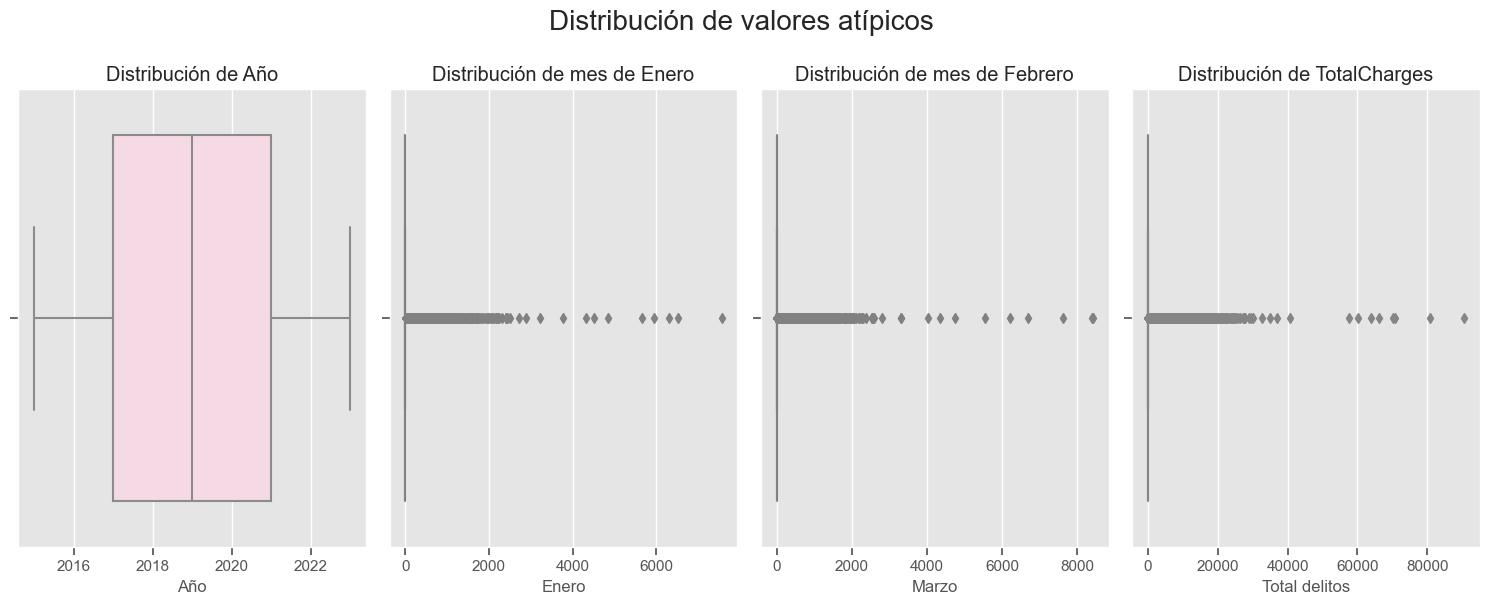

In [6]:
# Definición de columnas numéricas
df_select['Total delitos'] = pd.to_numeric(df['Total delitos'], errors='coerce')
df_select['Total delitos'] = df_select['Total delitos'].astype(float)
df_select['Total delitos'] = df_select['Total delitos'].fillna(df['Total delitos'].mean())

# Graficar boxplots
fig, axs = plt.subplots(ncols=4, figsize=(15,6))
fig.suptitle('Distribución de valores atípicos ', fontsize=20, y=1.0)
sns.boxplot(x=df['Año'], ax=axs[0], color='#F9D5E5')
sns.boxplot(x=df['Enero'], ax=axs[1], color='#FDD5B1')
sns.boxplot(x=df['Marzo'], ax=axs[2], color='#FDD5B1')
sns.boxplot(x=df['Total delitos'], ax=axs[3], color='#E2F0CB')
axs[0].set_title('Distribución de Año')
axs[1].set_title('Distribución de mes de Enero')
axs[2].set_title('Distribución de mes de Febrero')
axs[3].set_title('Distribución de TotalCharges')
plt.tight_layout()
plt.show()

## 3.3 Distribución de variables categóricas

In [7]:
def graficos_eda_categoricos(cat):
    
    #Calculamos el número de filas que necesitamos
    from math import ceil
    filas = ceil(cat.shape[1] / 1)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 1, figsize = (10, filas * 10))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat 

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)

Eliminamos las columnas que no son de nuestro interes y solo mostramos los que si

In [8]:
df_eda=df_select.loc[:, ['Bien jurídico afectado','Subtipo de delito','Modalidad','Sexo/Averiguación previa','Rango de edad']]

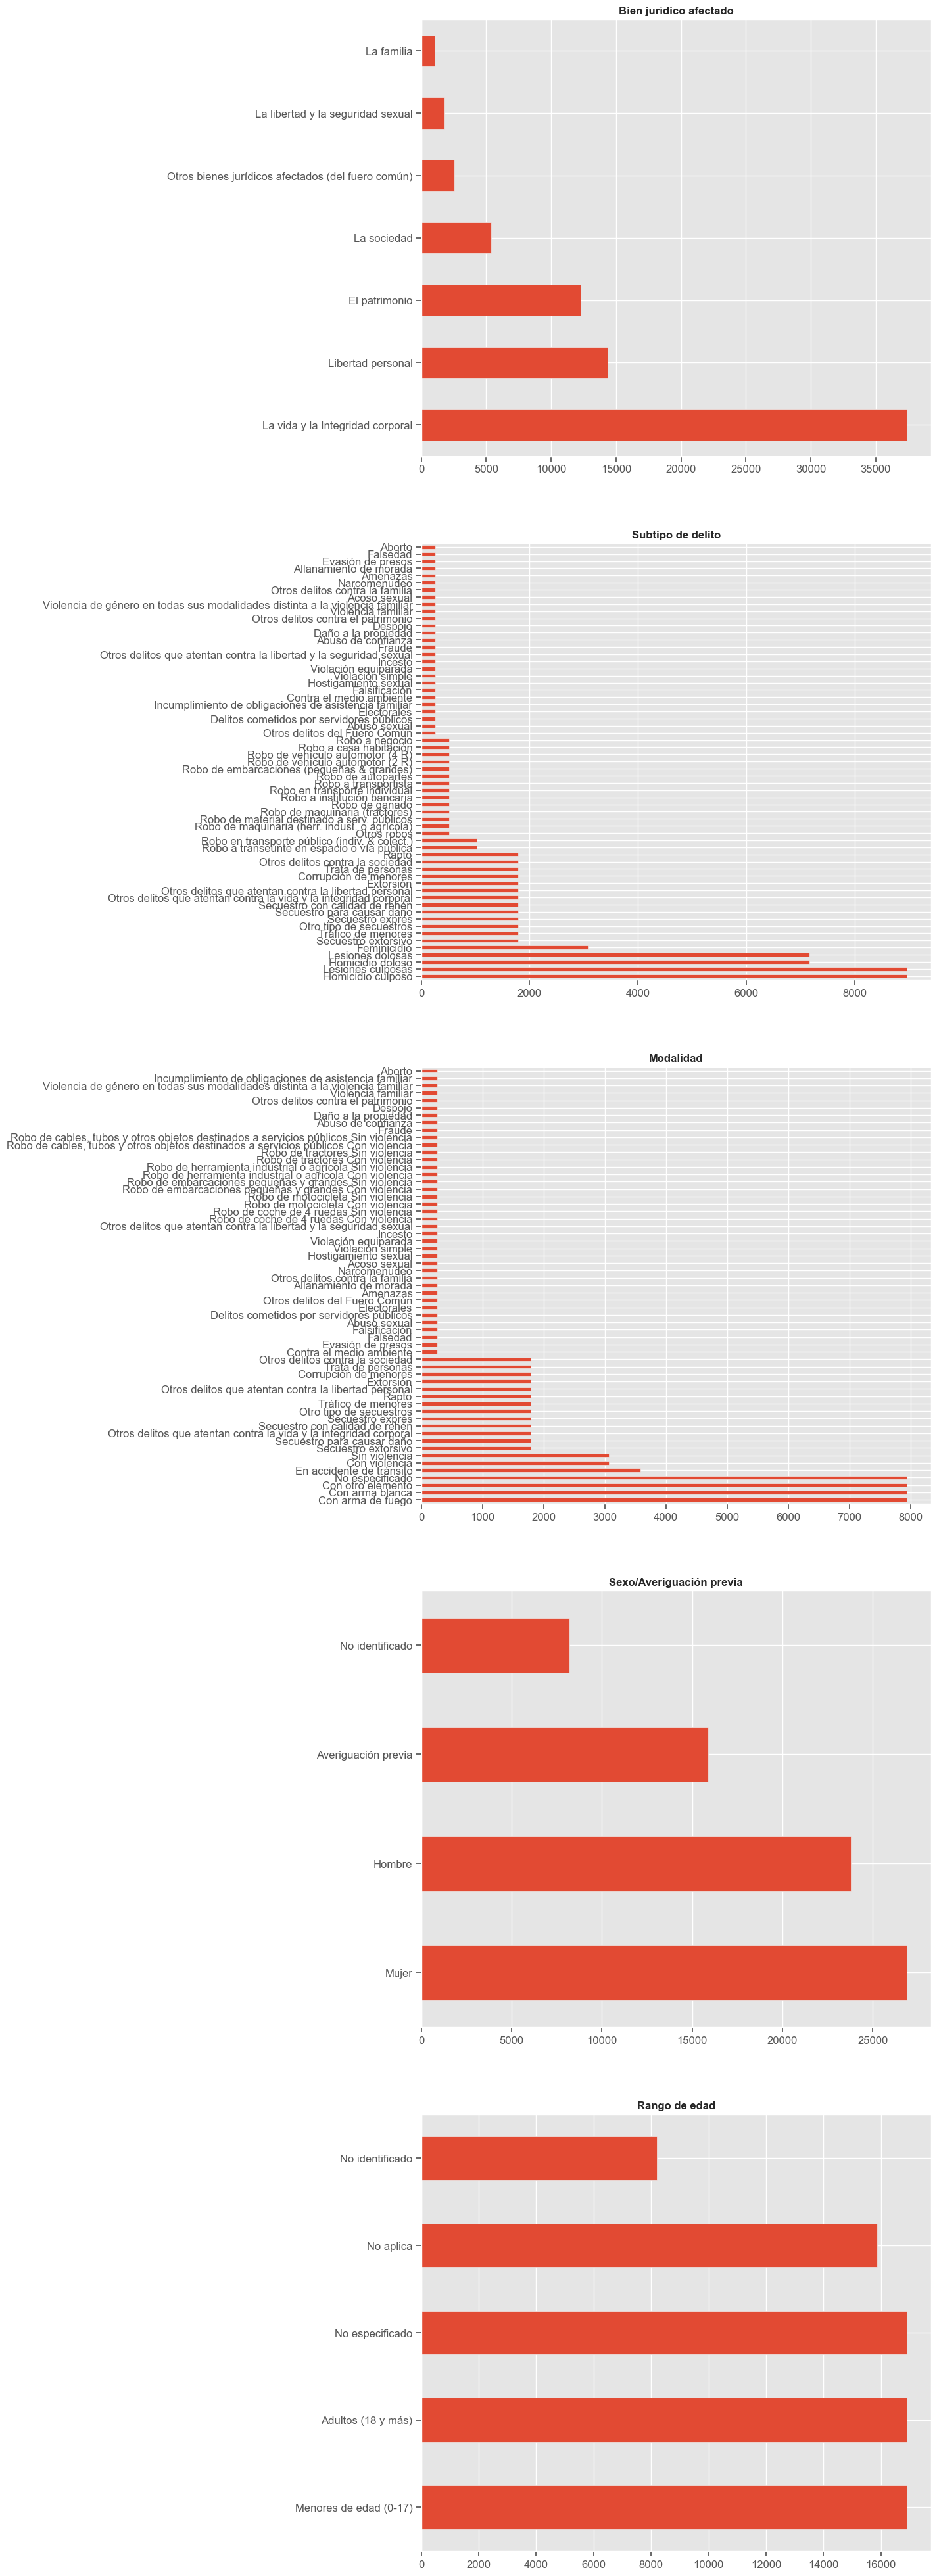

In [9]:
graficos_eda_categoricos(df_eda.select_dtypes('O'))

### Conclusiones

*   El análisis de las variables categóricas muestra algunas tendencias interesantes en cuanto a la distribución de los datos.

*   La variable "sexo/averiguacion previa" muestra una distribución bastante uniforme, con la mayoría de los deitos comentidos sufren el genero "Mujer", siguiendo del genero "Masculino", lo que sugiere que los crimes estan siendo afectado mas a Mujeres.

*   La variable "Modalidad" muestra que en la mayoria de los delitos son cometidos con armas de fuego, asi como arma blanca y accidentes de trafico, lo que se sugiere que en la sociedad se debe de tener en cuenta la situacion del manejo de armas y tomar precaciones en el trafico. 

*   La variable "Bien juridico afectado" muestra que la mayoría de los delitos cometidos afecta en "La vida y la Integracion corporal", seguido de Libertad persinal y Patrimonio. Por lo que se sugiere dar mas atencion en los derechos humanos de las personas que estan siendo afectadas.

*   La variable "Rango de edad" muestra que la mayoría de los delitos estan afectos en Menores de edad, asi como en Adultos y tambien a quienes no han sido afectados por lo que es importante que el gobierno se centre en la sociedad de ese rango de edad para salvaguardar su seguridad.

En general, este análisis exploratorio proporciona información valiosa sobre las características de los afectados de los crimenes en la Republica Mexicana, lo que puede ayudar a la empresa a enfocarse al Estado con mayor crimenes y tomar acciones.

## ANALISIS VARIABLES NUMERICAS

In [10]:
def estadisticos_cont(num):
    #Calculamos describe
    estadisticos = num.describe().T
    #Añadimos la mediana
    estadisticos['median'] = num.median()
    #Reordenamos para que la mediana esté al lado de la media
    estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7,8]]
    #Lo devolvemos
    return(estadisticos)

In [11]:
estadisticos_cont(df_select.select_dtypes('number'))

,count,mean,median,std,min,25%,50%,75%,max,median
Año,74752.0,2018.500000,2018.5,2.291303,2015.0,2016.75,2018.5,2020.25,2022.0,2018.5
Clave_Ent,74752.0,16.500000,16.5,9.233154,1.0,8.75,16.5,24.25,32.0,16.5
Enero,74752.0,16.360525,0.0,106.202190,0.0,0.00,0.0,1.00,7565.0,0.0
Febrero,74752.0,16.441834,0.0,108.201395,0.0,0.00,0.0,1.00,7888.0,0.0
Marzo,74752.0,18.321249,0.0,120.517912,0.0,0.00,0.0,2.00,8418.0,0.0
Abril,74752.0,17.109027,0.0,112.847277,0.0,0.00,0.0,2.00,7916.0,0.0
Mayo,74752.0,18.052989,0.0,118.971911,0.0,0.00,0.0,2.00,7899.0,0.0
Junio,74752.0,17.902692,0.0,114.668999,0.0,0.00,0.0,2.00,7386.0,0.0
Julio,74752.0,17.657093,0.0,113.156781,0.0,0.00,0.0,2.00,7619.0,0.0
Agosto,74752.0,18.170845,0.0,116.964523,0.0,0.00,0.0,2.00,7955.0,0.0


### Conclusiones

De los nulos pendientes de imputación que sean numéricas solo hay en los campos Enero, Febrero, Marzo, Abril, Mayo, junio, Julio, Agosto, Septiembre, Octubre ,Noviembre, Diciembre, pero como esta trabjando con un rango de fechas que es del 2025-2022 ya no hay que imputar nada

## 3.8 Análisis específicos para responder a las preguntas de investigación

### Cuáles son los estados con la tasa más alta de delitos según los reportes disponibles?

In [12]:
# Sumamos el total de delitos agrupanto por estado
df_delitos = df_select.groupby('Entidad').sum()
df_delitos.reset_index()

,Entidad,Año,Clave_Ent,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Total delitos
0,Aguascalientes,4715216,2336,20587,20059,22851.0,21303.0,22861.0,22851.0,23392.0,23639.0,22999.0,23737.0,21626.0,21033.0,266938.0
1,Baja California,4715216,4672,69404,65761,74201.0,70366.0,72774.0,73354.0,75198.0,77270.0,74033.0,76489.0,70948.0,69491.0,869289.0
2,Baja California Sur,4715216,7008,14096,13840,14903.0,13675.0,14505.0,15419.0,14571.0,14999.0,14665.0,15734.0,14644.0,13899.0,174950.0
3,Campeche,4715216,9344,3277,3236,3699.0,3261.0,3207.0,3419.0,3694.0,3548.0,3475.0,3731.0,5248.0,5226.0,45021.0
4,Chiapas,4715216,16352,14307,14081,15575.0,14195.0,14374.0,13982.0,14322.0,15428.0,14579.0,15456.0,14502.0,13275.0,174076.0
5,Chihuahua,4715216,18688,43264,44491,48445.0,45916.0,49574.0,49950.0,49342.0,49403.0,47803.0,49411.0,42860.0,42922.0,563381.0
6,Ciudad de México,4715216,21024,130945,133114,148582.0,134754.0,142219.0,140596.0,143685.0,147703.0,143008.0,153729.0,145172.0,138512.0,1702019.0
7,Coahuila de Zaragoza,4715216,11680,32158,34166,38803.0,35550.0,38029.0,41323.0,37328.0,38961.0,38808.0,36661.0,33258.0,31682.0,436727.0
8,Colima,4715216,14016,15125,14003,15587.0,14260.0,15163.0,14804.0,14859.0,14736.0,14596.0,15806.0,15261.0,14397.0,178597.0
9,Durango,4715216,23360,18979,19288,21204.0,19972.0,21190.0,22006.0,20818.0,21228.0,21004.0,21473.0,19341.0,17833.0,244336.0


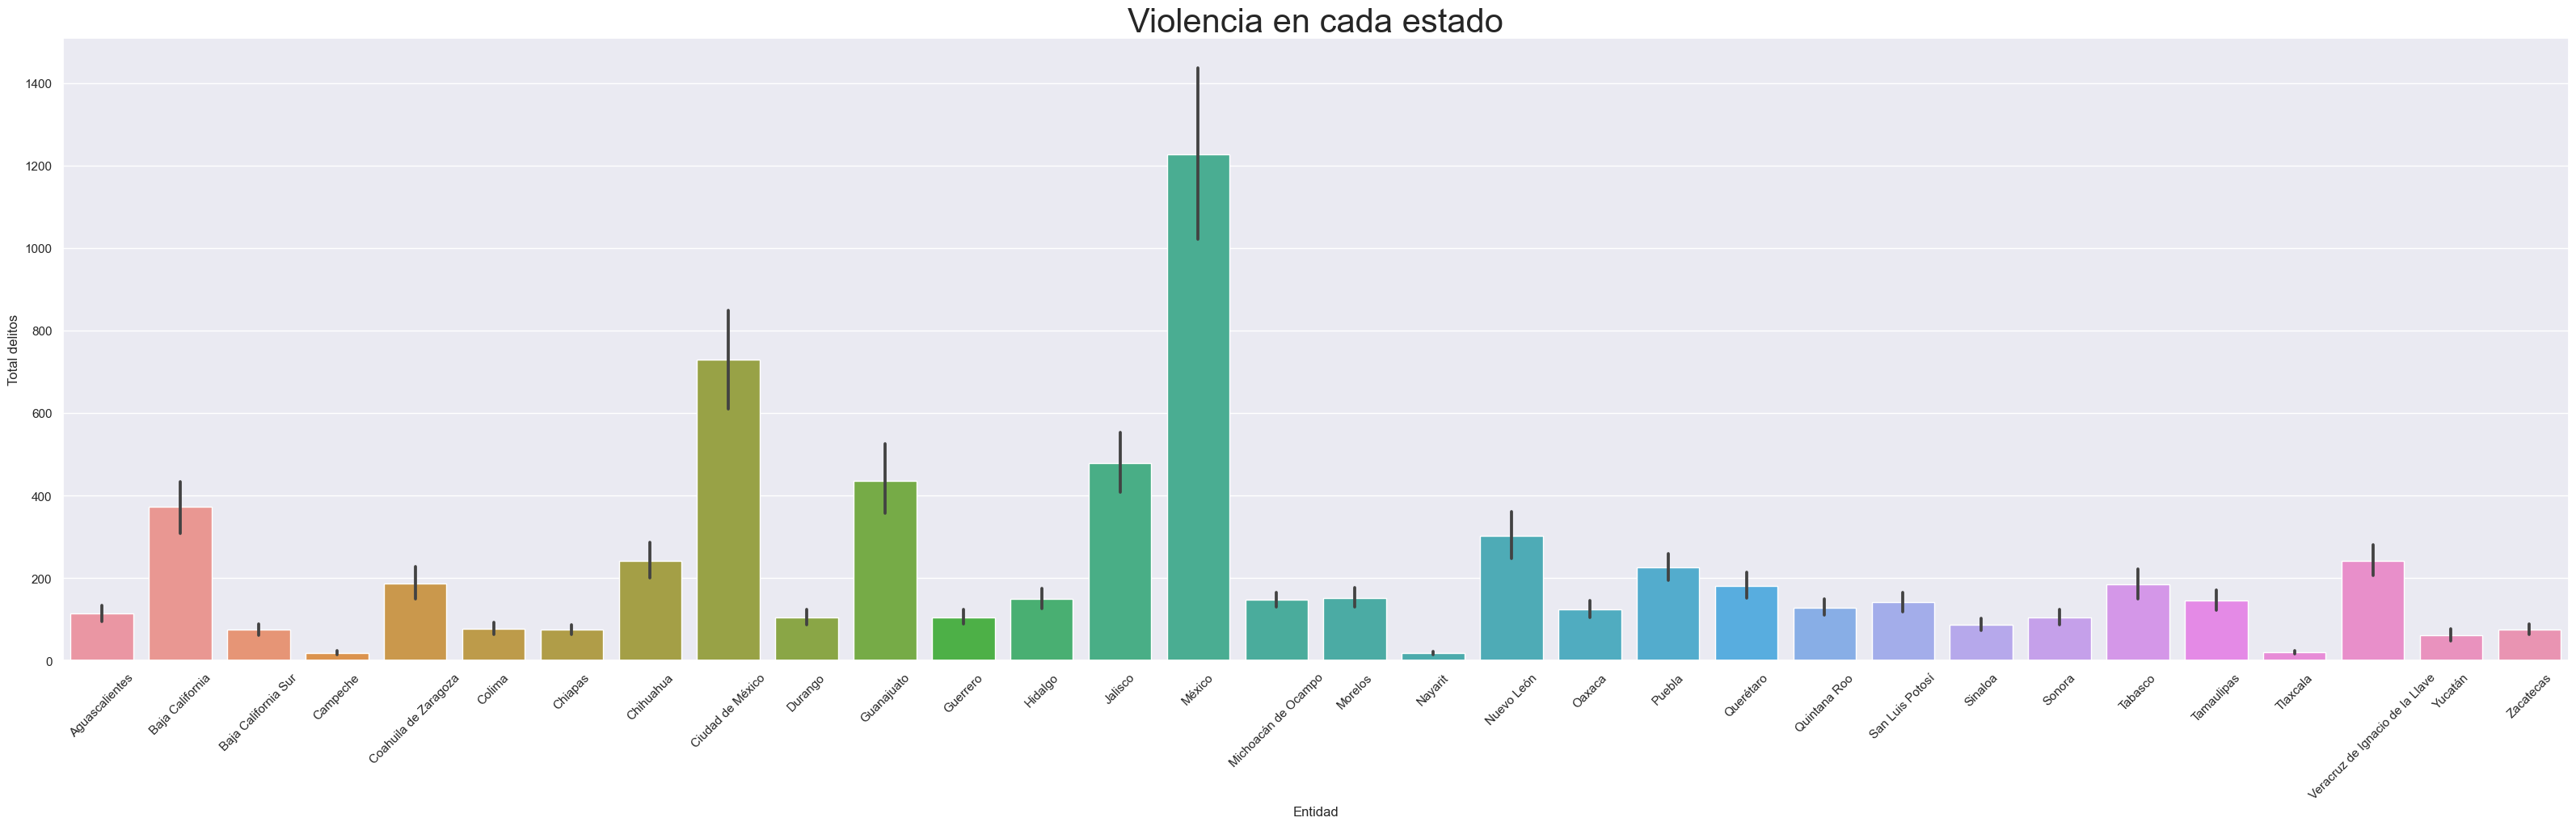

In [13]:
# Graficamos lo que obtumos en la consulta anterior
sns.set(rc = {'figure.figsize':(40,10)})
#plot = sns.lineplot( x=name, y=value)
plot = sns.barplot(data=df_select, x="Entidad", y="Total delitos")
plot.axes.set_title("Violencia en cada estado",fontsize=30)
plt.xticks(rotation=45)
plt.show()

De acuerdo a la grafica, podemos observar que es estado con mayor delitos en la Republica Mexicana es es Estado de México, por lo que ahora nos estaremos enfocando en hacer un analisis mas exaustivo de este Estado

### Análisis del comportamiento del Tipo de violencia con el estado con mayor violencia

In [14]:
# Filtramos el dataframe por la entidad con mayor delitos que es México
df_Mexico = df_select[df_select['Entidad'] == 'México']
df_Mexico.reset_index()

,index,Año,Clave_Ent,Entidad,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,Febrero,...,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Total delitos,Sexo/Averiguación previa,Rango de edad
0,868,2015,15,México,La libertad y la seguridad sexual,Delito sexual,Abuso sexual,Abuso sexual,0,0,...,9.0,78.0,83.0,74.0,100.0,93.0,93.0,532.0,Averiguación previa,No aplica
1,869,2015,15,México,La libertad y la seguridad sexual,Delito sexual,Acoso sexual,Acoso sexual,12,17,...,17.0,15.0,10.0,10.0,19.0,17.0,11.0,166.0,Averiguación previa,No aplica
2,870,2015,15,México,La libertad y la seguridad sexual,Delito sexual,Hostigamiento sexual,Hostigamiento sexual,5,7,...,9.0,6.0,5.0,2.0,7.0,3.0,3.0,59.0,Averiguación previa,No aplica
3,871,2015,15,México,La libertad y la seguridad sexual,Violación,Violación simple,Violación simple,93,62,...,72.0,73.0,88.0,78.0,81.0,103.0,100.0,964.0,Averiguación previa,No aplica
4,872,2015,15,México,La libertad y la seguridad sexual,Violación,Violación equiparada,Violación equiparada,37,48,...,49.0,41.0,54.0,49.0,53.0,52.0,45.0,581.0,Averiguación previa,No aplica
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2331,72821,2022,15,México,Libertad personal,Otros delitos que atentan contra la libertad p...,Otros delitos que atentan contra la libertad p...,Otros delitos que atentan contra la libertad p...,40,36,...,28.0,12.0,14.0,8.0,17.0,5.0,28.0,301.0,No identificado,No identificado
2332,72822,2022,15,México,El patrimonio,Extorsión,Extorsión,Extorsión,54,48,...,196.0,80.0,48.0,33.0,39.0,62.0,70.0,924.0,No identificado,No identificado
2333,72823,2022,15,México,La sociedad,Corrupción de menores,Corrupción de menores,Corrupción de menores,0,0,...,0.0,4.0,4.0,6.0,1.0,1.0,0.0,17.0,No identificado,No identificado
2334,72824,2022,15,México,La sociedad,Trata de personas,Trata de personas,Trata de personas,4,3,...,4.0,7.0,2.0,4.0,2.0,5.0,4.0,44.0,No identificado,No identificado


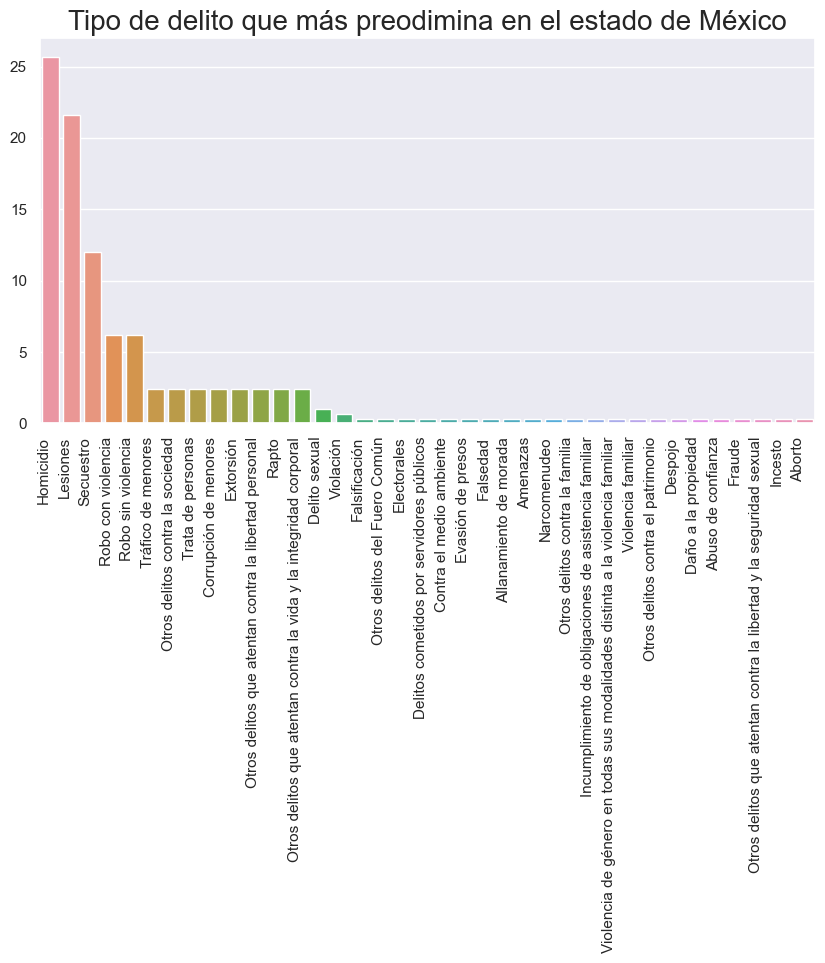

In [15]:
# Graficamos sobre los tipos de delitos que mas ocurre en el estado con mayor violencia

sns.set(rc = {'figure.figsize':(40,10)})
violencia_mexico=df_Mexico['Tipo de delito'].value_counts(normalize = True) * 100 
sns.set_style("darkgrid") 
plt.figure(figsize=(10,5)) 
plot= sns.barplot(x=violencia_mexico.index, y=violencia_mexico.values) 
plot.axes.set_title("Tipo de delito que más preodimina en el estado de México",fontsize=20)
# Rotation of the bars names
plt.xticks(rotation=90, ha='right')
plt.show()

### Como es el comportamiento de la violencia en los respectivos meses?

In [16]:
# Consultar la cantidad de delitos en Total por el Tipo de Homicidio
df_delitos = df_Mexico['Tipo de delito'].value_counts()
df_delitos

Homicidio                                                                        600
Lesiones                                                                         504
Secuestro                                                                        280
Robo con violencia                                                               144
Robo sin violencia                                                               144
Tráfico de menores                                                                56
Otros delitos contra la sociedad                                                  56
Trata de personas                                                                 56
Corrupción de menores                                                             56
Extorsión                                                                         56
Otros delitos que atentan contra la libertad personal                             56
Rapto                                                            

<AxesSubplot:xlabel='Tipo de delito', ylabel='Count'>

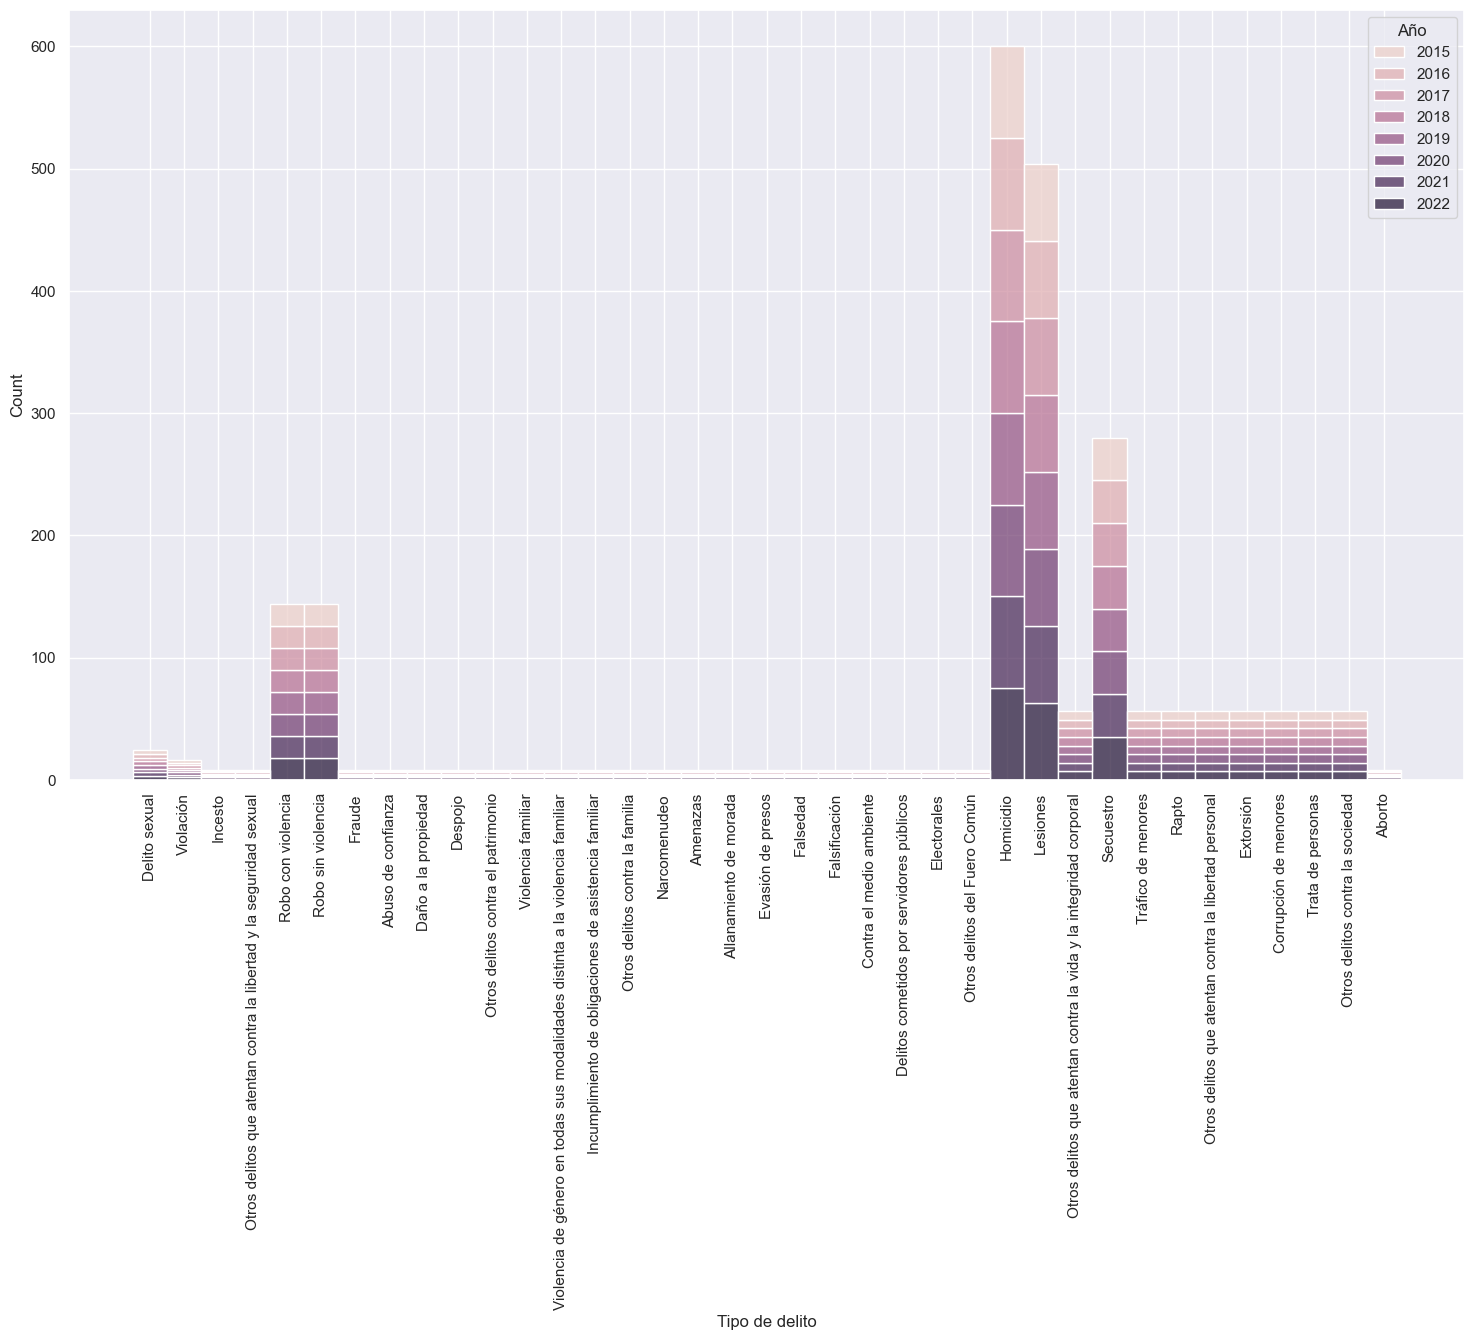

In [17]:
#Graficamos con los datos obtenidos en la consulta anterior
plt.figure(figsize=(18,10))
plt.xticks(rotation=90)
sns.histplot(data=df_Mexico, x='Tipo de delito', hue="Año", multiple="stack")


### Comportamiento de violencia por mes en los años

In [18]:
# Agrupamos el dataframe por Año
df_año = df_Mexico.groupby('Año').sum()
df_año

,Clave_Ent,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Total delitos
Año,,,,,,,,,,,,,,
2015,4380,27064,26270,28863.0,27480.0,27629.0,27657.0,27097.0,27234.0,27515.0,28071.0,27565.0,26143.0,328588.0
2016,4380,24378,29217,30779.0,31305.0,32162.0,25349.0,23673.0,25668.0,27113.0,27574.0,25988.0,26379.0,329585.0
2017,4380,25028,24674,28735.0,26891.0,31104.0,30505.0,30427.0,32012.0,29796.0,33209.0,30717.0,28971.0,352069.0
2018,4380,27216,26478,28578.0,29637.0,30845.0,28957.0,29007.0,30220.0,29070.0,30922.0,28165.0,26772.0,345867.0
2019,4380,25508,26180,30398.0,28658.0,32728.0,31954.0,31369.0,31661.0,30902.0,32290.0,30188.0,29706.0,361542.0
2020,4380,29816,30313,30666.0,25550.0,23527.0,26756.0,28954.0,30850.0,30763.0,32721.0,30569.0,29615.0,350100.0
2021,4380,28032,29813,35543.0,33364.0,34445.0,33140.0,32956.0,33208.0,33345.0,35632.0,32503.0,33431.0,395412.0
2022,4380,31703,31623,36929.0,34948.0,37220.0,35223.0,32345.0,33520.0,32558.0,34477.0,32459.0,31383.0,404388.0


In [19]:
# Seleccionamos solo las columnas de interes
df_filter_año=df_año.loc[:, ['Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosto','Septiembre','Octubre','Noviembre','Diciembre']]

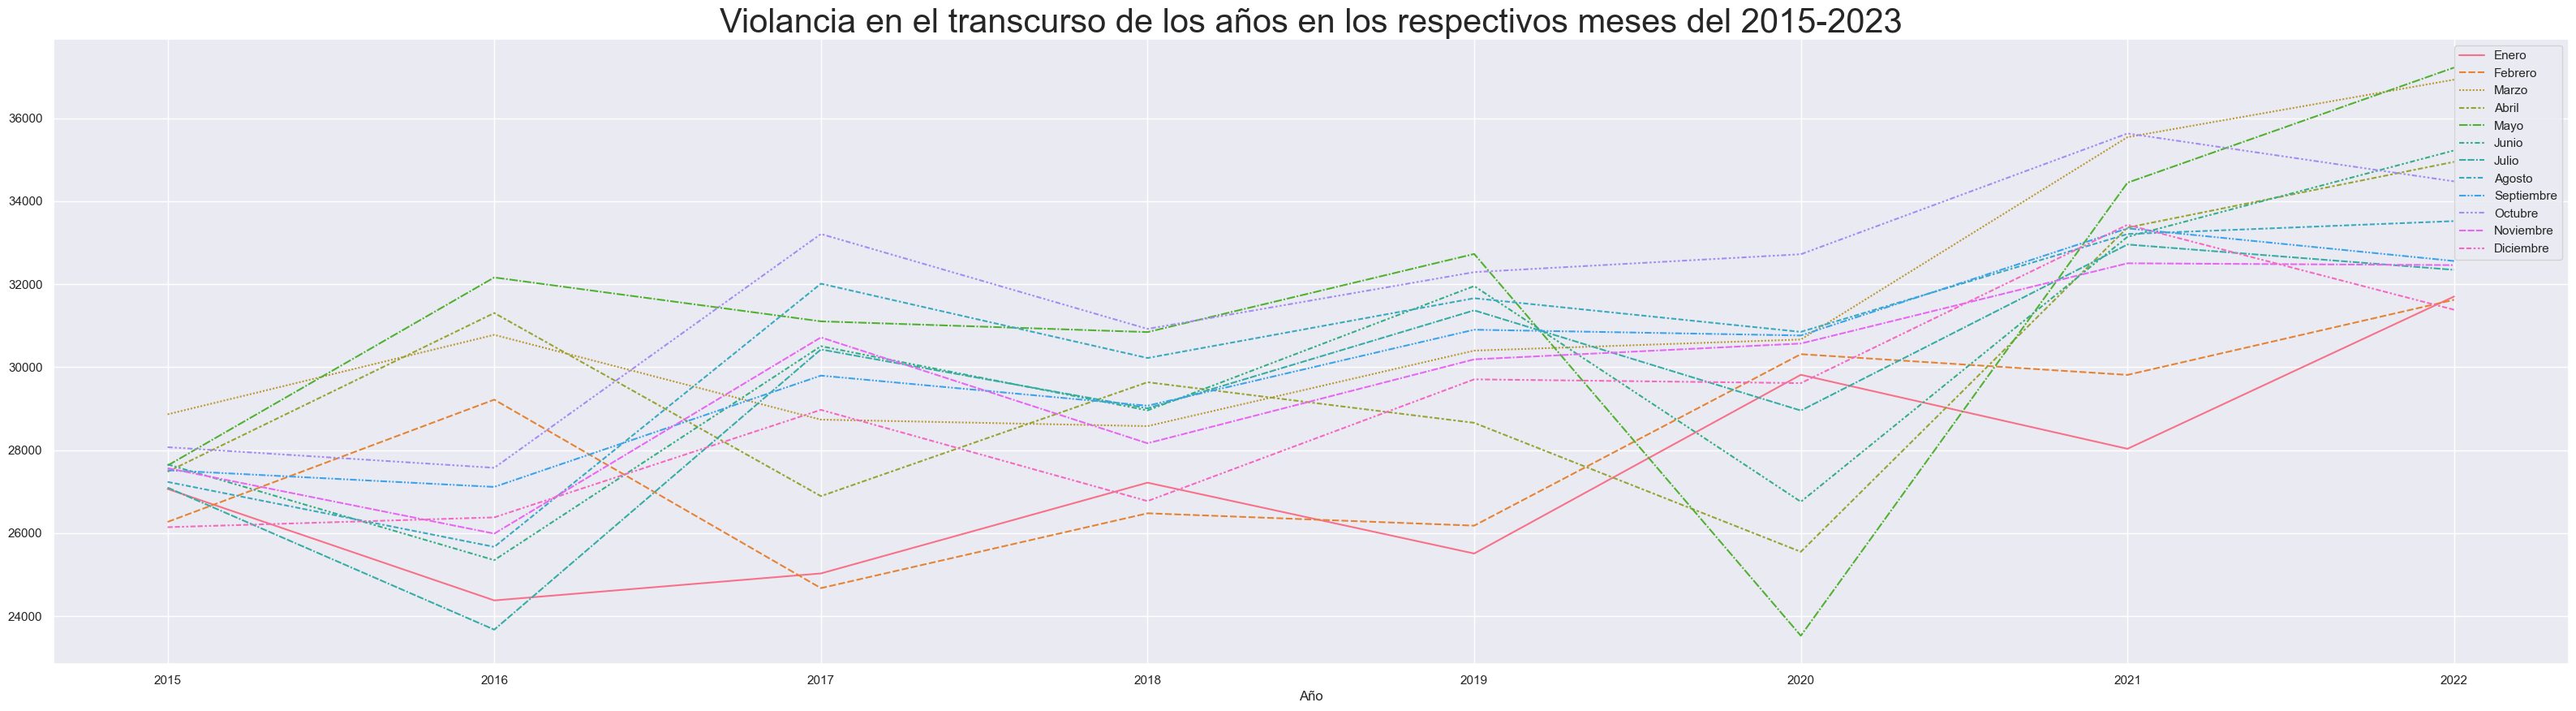

In [20]:
#Graficamos 
sns.set_theme(style="darkgrid")
sns.set(rc = {'figure.figsize':(40,10)})
b = sns.lineplot(data=df_filter_año)
b.axes.set_title("Violancia en el transcurso de los años en los respectivos meses del 2015-2023",fontsize=30)
plt.show()

### Afectaciones comunes en la sociedad de cada mes en el periodo 2015-2023

In [21]:
# Agrupamos el dataframe por la columna "Bien juridico afectado"
df_juridico = df_Mexico.groupby('Bien jurídico afectado').sum()
df_juridico

,Año,Clave_Ent,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Total delitos
Bien jurídico afectado,,,,,,,,,,,,,,,
El patrimonio,775104,5760,118068,116497,127620.0,120451.0,125032.0,120946.0,121310.0,125803.0,122406.0,129084.0,121551.0,117862.0,1466630.0
La familia,64592,480,8641,9594,10978.0,11449.0,11771.0,12158.0,11154.0,11870.0,11766.0,12221.0,11086.0,10787.0,133475.0
La libertad y la seguridad sexual,113036,840,3018,3513,4352.0,4205.0,4566.0,4473.0,3920.0,4206.0,4270.0,4636.0,4267.0,3787.0,49213.0
La sociedad,339108,2520,2112,1930,1959.0,1697.0,1686.0,1881.0,1545.0,1775.0,1831.0,2171.0,2005.0,2086.0,22678.0
La vida y la Integridad corporal,2357608,17520,38471,41187,48754.0,47587.0,51077.0,45892.0,43955.0,44416.0,46005.0,47744.0,44255.0,44148.0,543491.0
Libertad personal,904288,6720,1897,1990,2301.0,2139.0,2241.0,2222.0,2294.0,2560.0,2352.0,2533.0,2333.0,2260.0,27122.0
Otros bienes jurídicos afectados (del fuero común),161480,1200,46538,49857,54527.0,50305.0,53287.0,51969.0,51650.0,53743.0,52432.0,56507.0,52657.0,51470.0,624942.0


In [22]:
# Seleccionamos solo las columnas de interes de la consulta anterior
columns_select = ['Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosto','Septiembre','Octubre','Noviembre','Diciembre']
df_filter_juridico = df_juridico[columns_select]
df_filter_juridico 

,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
Bien jurídico afectado,,,,,,,,,,,,
El patrimonio,118068,116497,127620.0,120451.0,125032.0,120946.0,121310.0,125803.0,122406.0,129084.0,121551.0,117862.0
La familia,8641,9594,10978.0,11449.0,11771.0,12158.0,11154.0,11870.0,11766.0,12221.0,11086.0,10787.0
La libertad y la seguridad sexual,3018,3513,4352.0,4205.0,4566.0,4473.0,3920.0,4206.0,4270.0,4636.0,4267.0,3787.0
La sociedad,2112,1930,1959.0,1697.0,1686.0,1881.0,1545.0,1775.0,1831.0,2171.0,2005.0,2086.0
La vida y la Integridad corporal,38471,41187,48754.0,47587.0,51077.0,45892.0,43955.0,44416.0,46005.0,47744.0,44255.0,44148.0
Libertad personal,1897,1990,2301.0,2139.0,2241.0,2222.0,2294.0,2560.0,2352.0,2533.0,2333.0,2260.0
Otros bienes jurídicos afectados (del fuero común),46538,49857,54527.0,50305.0,53287.0,51969.0,51650.0,53743.0,52432.0,56507.0,52657.0,51470.0


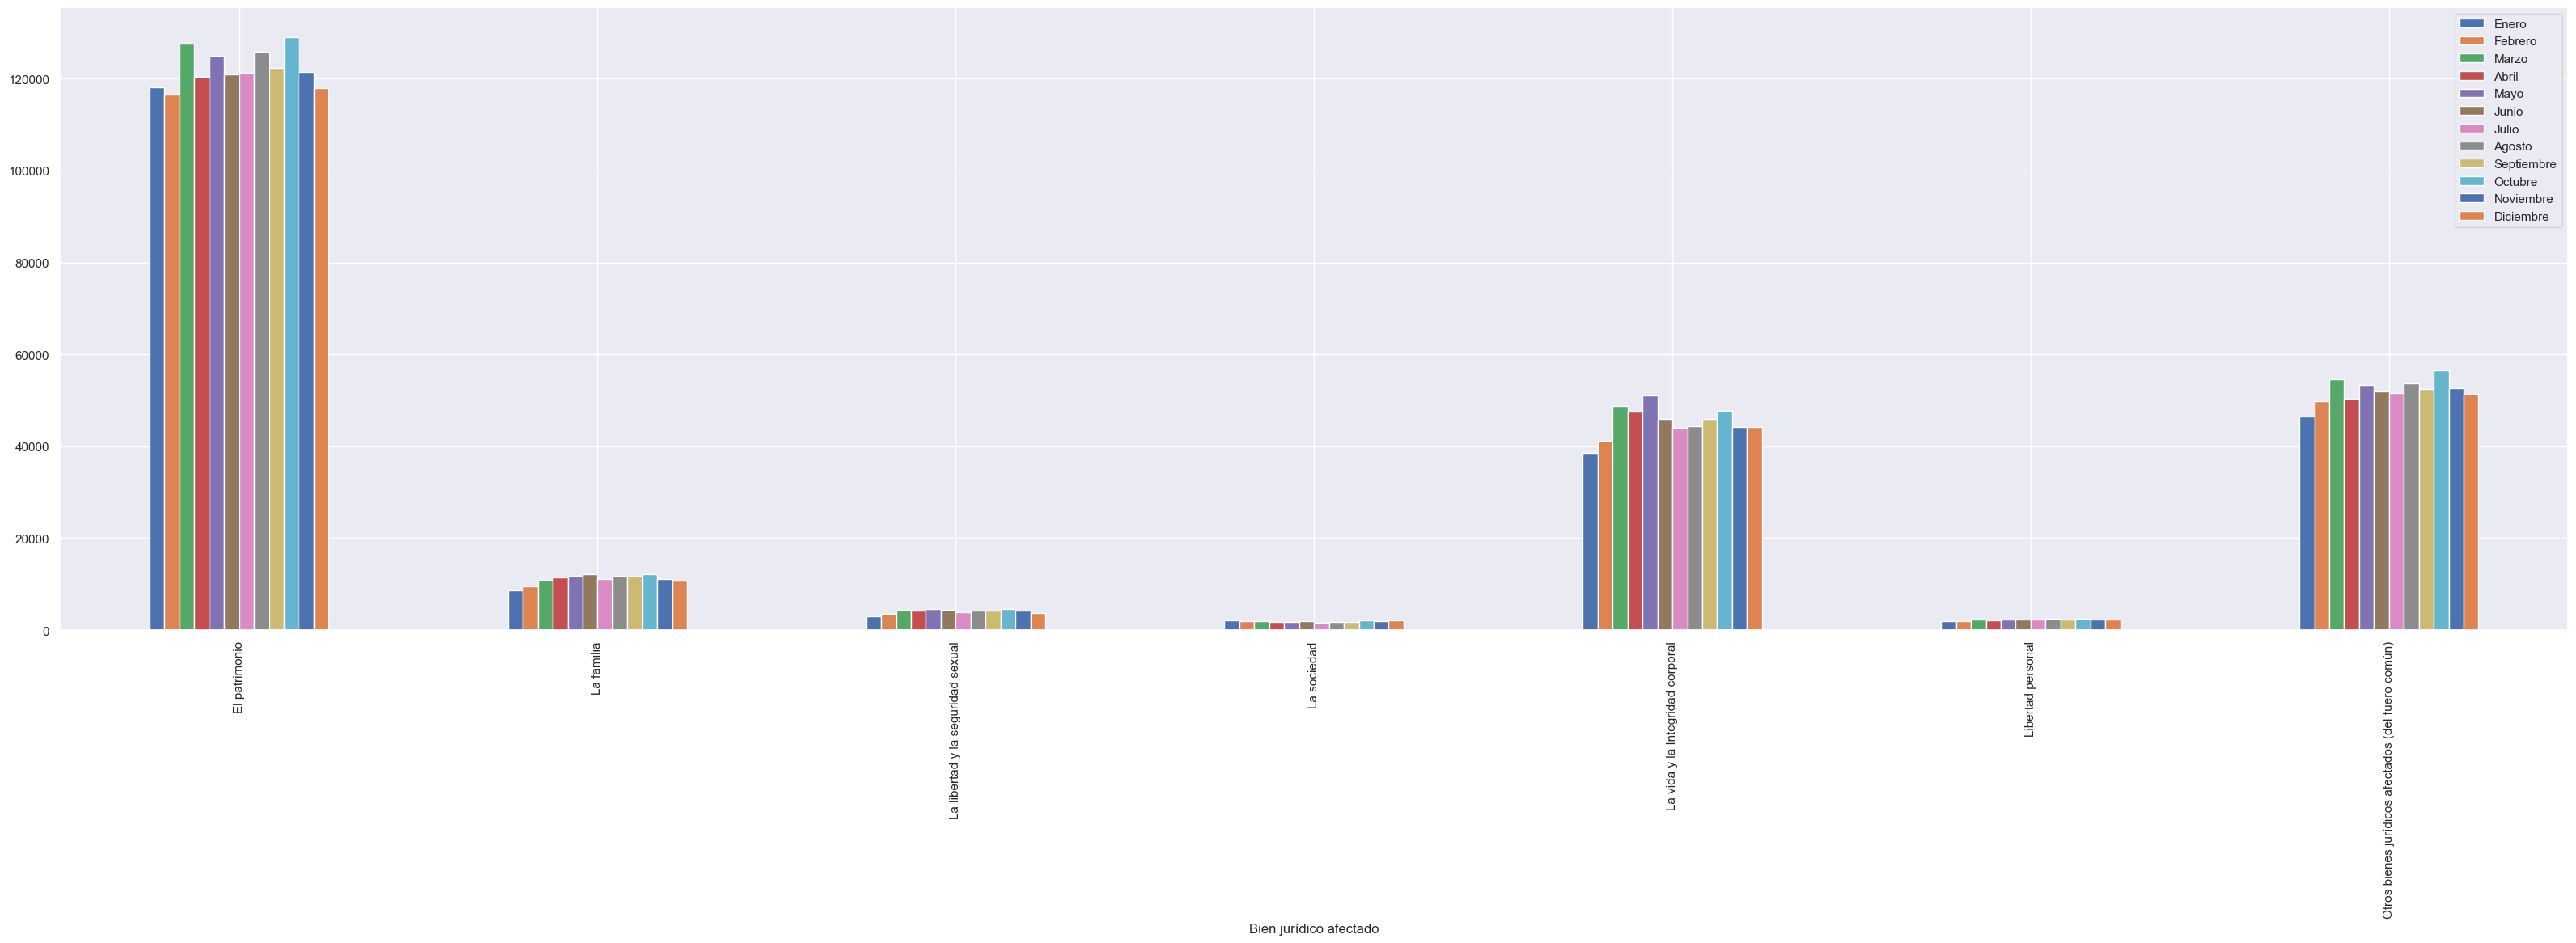

In [23]:
#Graficamos

sums=df_filter_juridico.sum(axis=1)
df_filter_juridico.plot.bar();


### Relacion de la Modalidad con el Tipo de delito

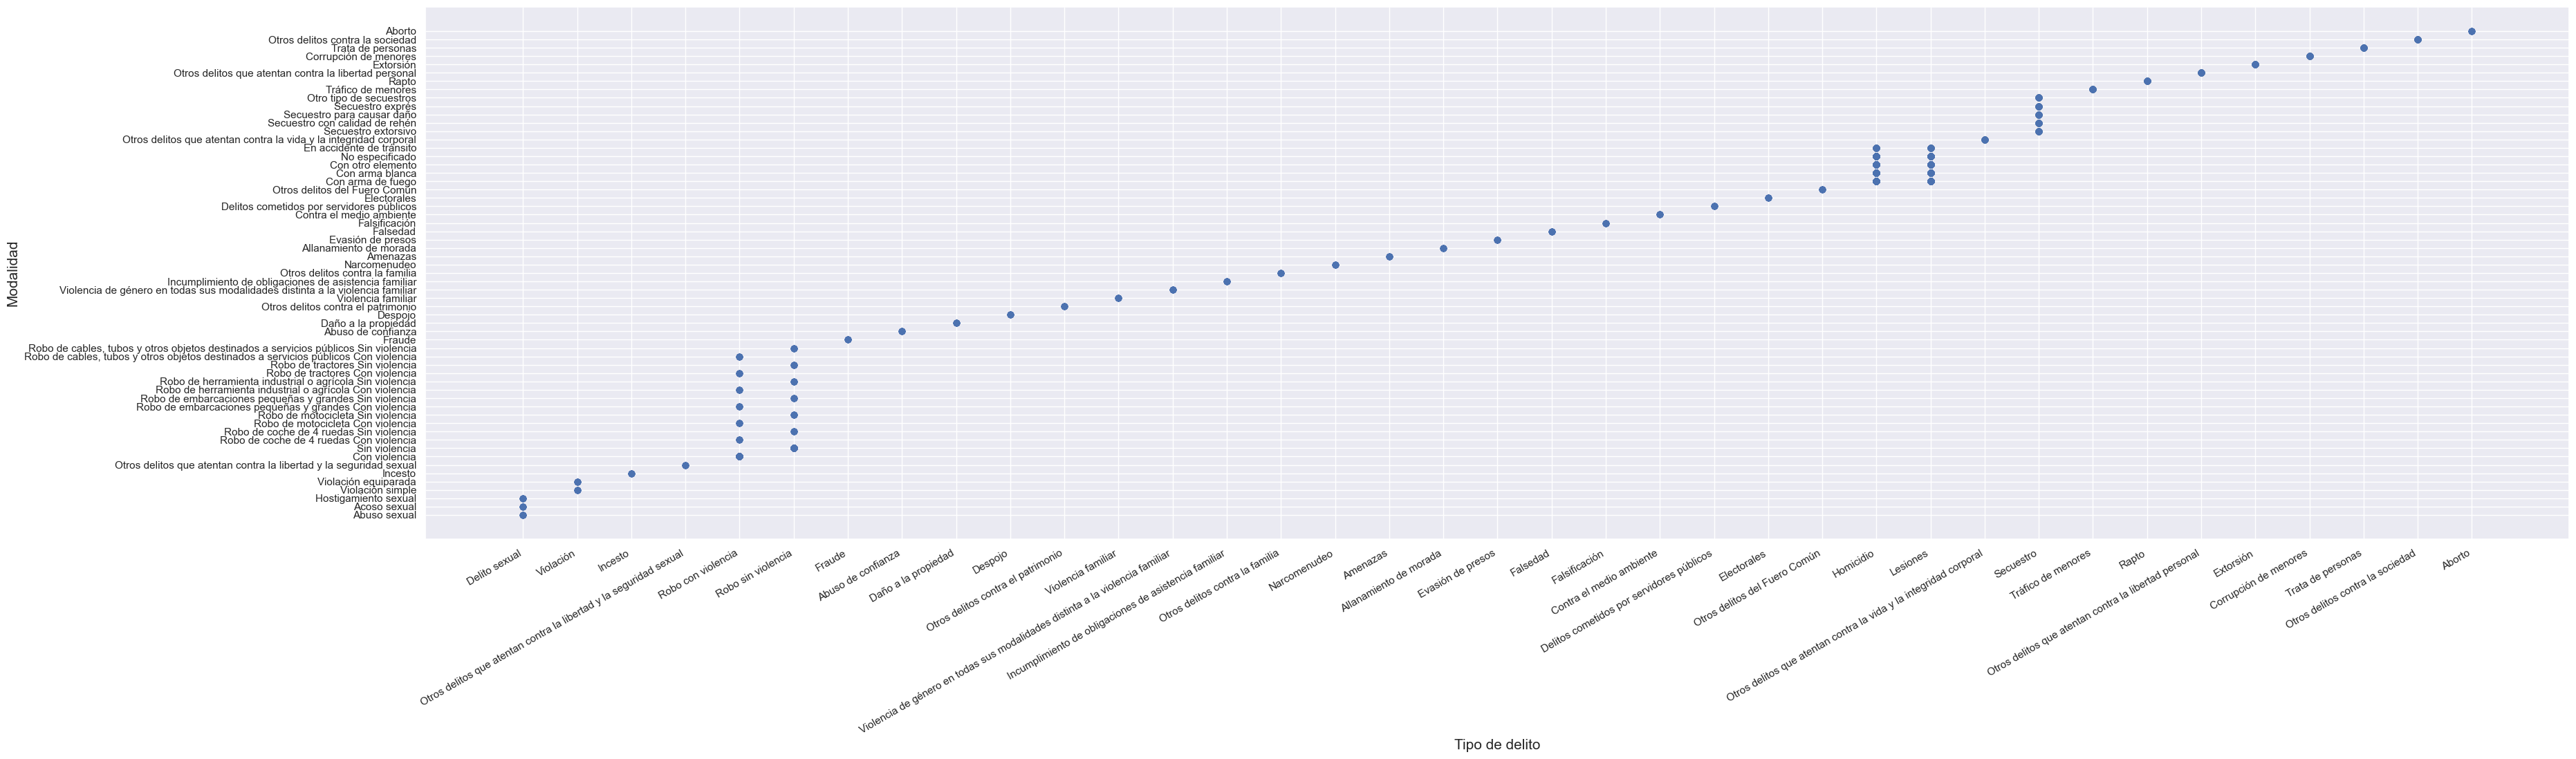

In [24]:
# Graficamos de la Relacion de la modalidad con el Tipo de delito
fig = plt.figure(figsize = (40, 10))

# Crear Grafica
plt.scatter(df_Mexico['Tipo de delito'], df_Mexico['Modalidad'])
 
plt.xlabel("Tipo de delito", fontsize=15)
plt.ylabel("Modalidad", fontsize=15)
# Rotation of the bars names
plt.xticks(rotation=30, ha='right')
plt.show()

### Afecciones de la Edad con  el Tipo de delito

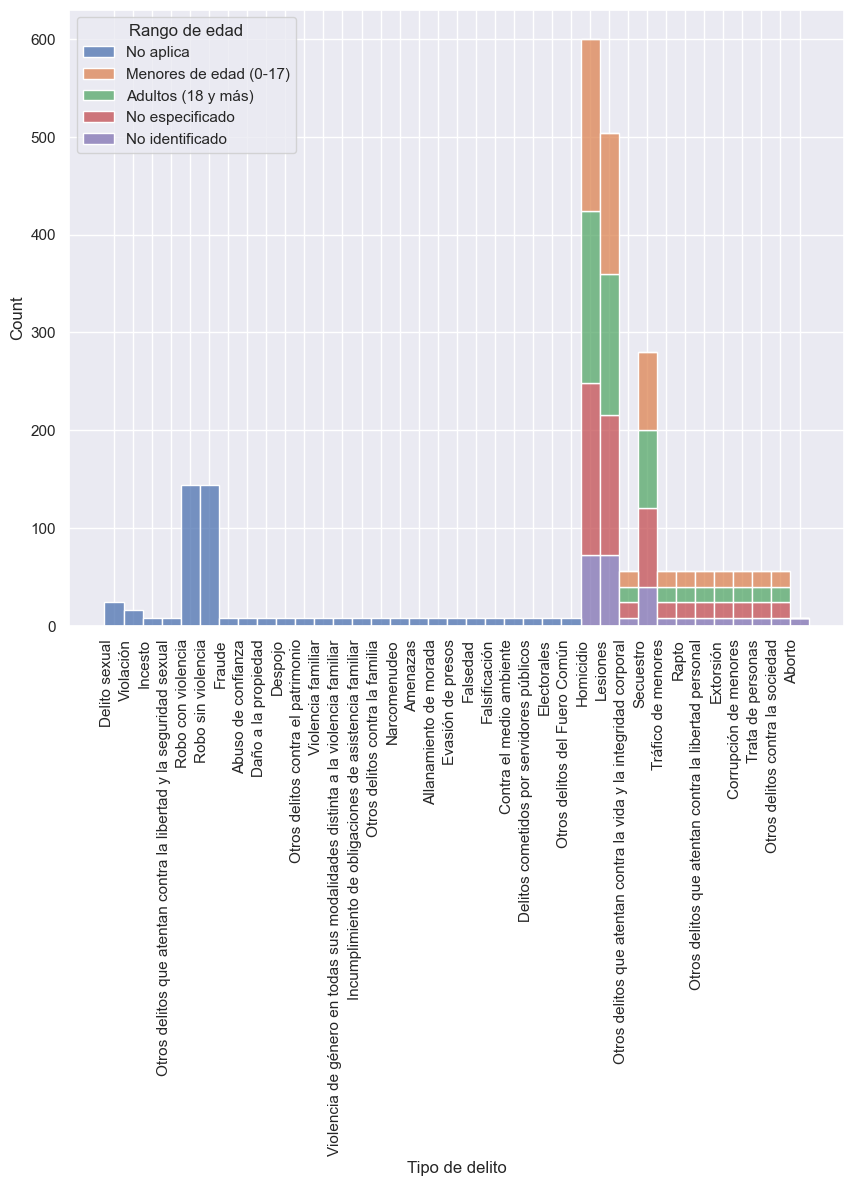

In [25]:
# Graficamos de la Relacion de la Edad con el Tipo de delito

plt.figure(figsize=(10,8))
sns.histplot(data=df_Mexico, x='Tipo de delito' , hue="Rango de edad", multiple="stack")

plt.xticks(rotation=90, ha='right')
plt.xticks(rotation=90, ha='right')
plt.show()

### Afecciones de Usuarios con  el Tipo de delito

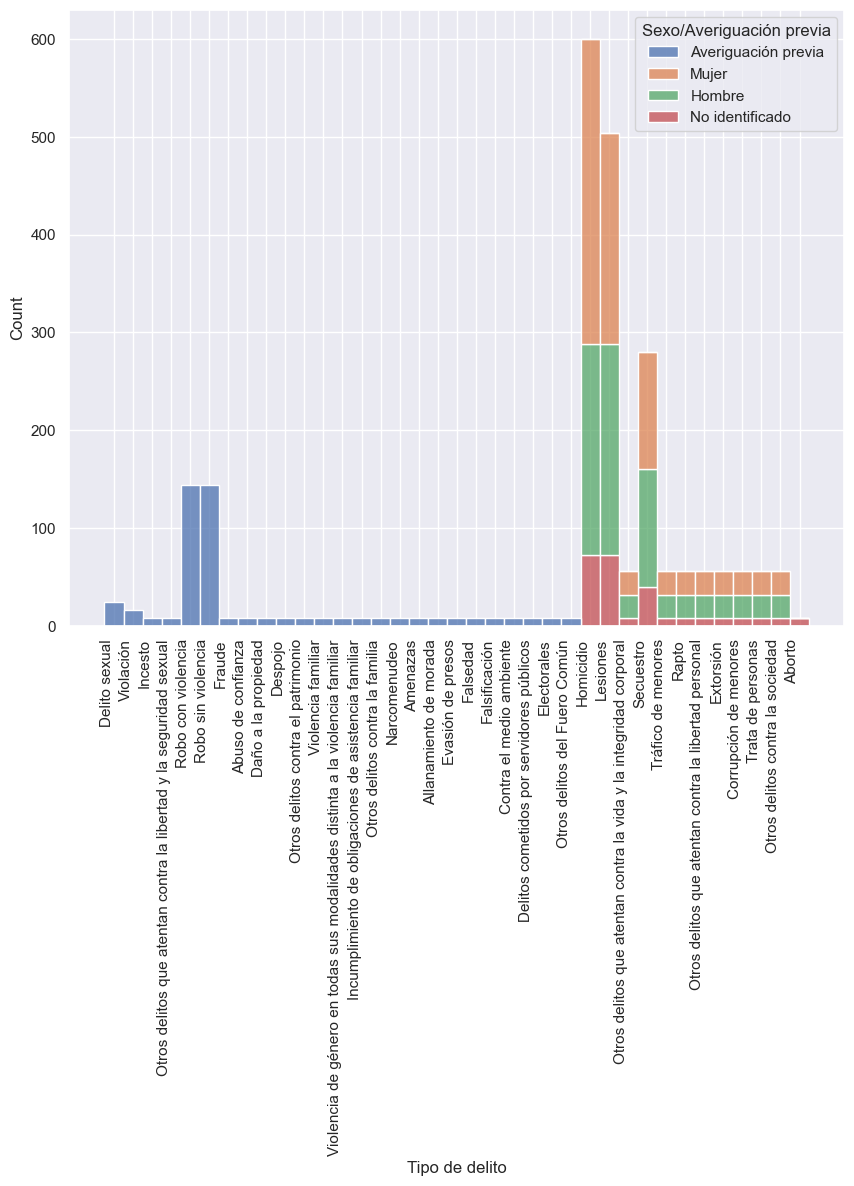

In [26]:
# Graficamos de la Relacion del Genero con el Tipo de delito

plt.figure(figsize=(10,8))
sns.histplot(data=df_Mexico, x='Tipo de delito' , hue="Sexo/Averiguación previa", multiple="stack")
plt.xticks(rotation=90, ha='right')
plt.show()

### Incremento de violencia por año

In [27]:
# Resetemos el index de la consulta anterior de df_filter_año
df = df_filter_año.reset_index()
df

,Año,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
0,2015,27064,26270,28863.0,27480.0,27629.0,27657.0,27097.0,27234.0,27515.0,28071.0,27565.0,26143.0
1,2016,24378,29217,30779.0,31305.0,32162.0,25349.0,23673.0,25668.0,27113.0,27574.0,25988.0,26379.0
2,2017,25028,24674,28735.0,26891.0,31104.0,30505.0,30427.0,32012.0,29796.0,33209.0,30717.0,28971.0
3,2018,27216,26478,28578.0,29637.0,30845.0,28957.0,29007.0,30220.0,29070.0,30922.0,28165.0,26772.0
4,2019,25508,26180,30398.0,28658.0,32728.0,31954.0,31369.0,31661.0,30902.0,32290.0,30188.0,29706.0
5,2020,29816,30313,30666.0,25550.0,23527.0,26756.0,28954.0,30850.0,30763.0,32721.0,30569.0,29615.0
6,2021,28032,29813,35543.0,33364.0,34445.0,33140.0,32956.0,33208.0,33345.0,35632.0,32503.0,33431.0
7,2022,31703,31623,36929.0,34948.0,37220.0,35223.0,32345.0,33520.0,32558.0,34477.0,32459.0,31383.0


In [28]:
#Sumamos los delitos por año
sums=df.sum(axis=1)
sums

0    330603.0
1    331601.0
2    354086.0
3    347885.0
4    363561.0
5    352120.0
6    397433.0
7    406410.0
dtype: float64

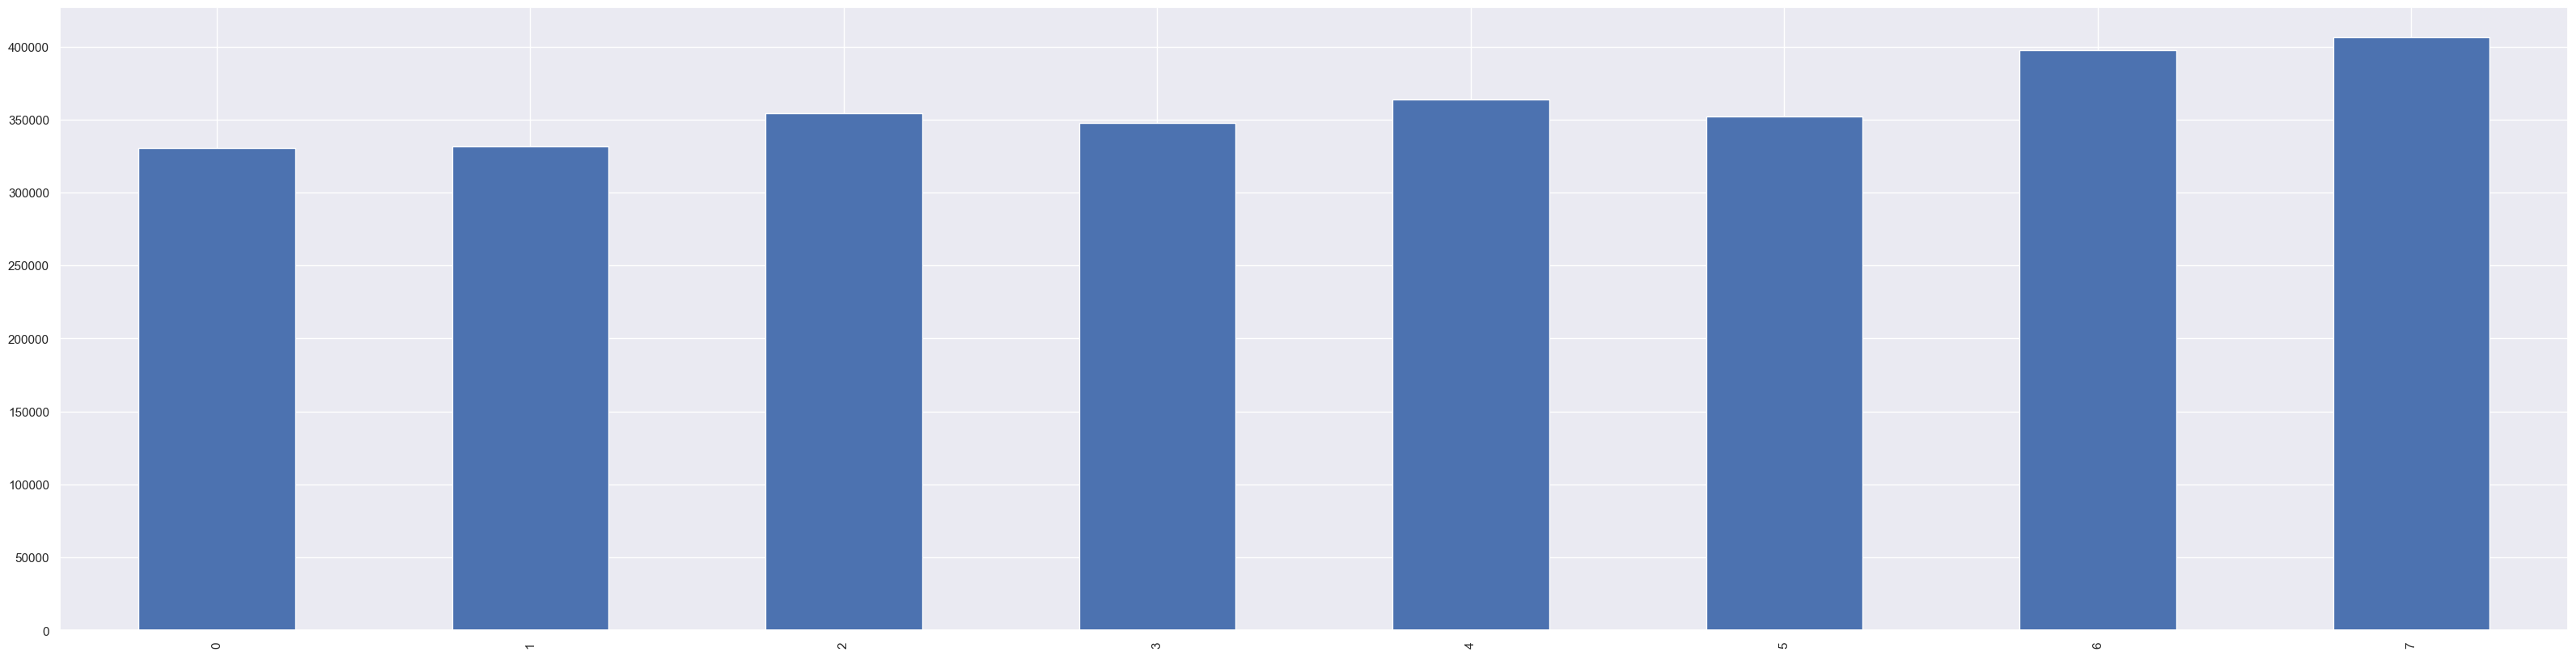

In [29]:
sums.plot.bar();

### Concluiones EDA


*   En el grafico 1) **Como es el comportamiento de la violencia en los respectivos meses?** se realizo una comparativa del tipo de delito por los años ocurridos en el periodo 2015 hasta febrero 2023, por lo cual podemos observar que predominan mas los Homicidios ,Leciones  y Secuentros. 

*   En el grafico 2) **Comportamiento de violencia por mes en los años** se puede observar la comparativa de los meses que se cometieron los delitos por el año, ocurriendo mas en el año 2022 y tambien por no mucho 2021 predomindando mas los meses de Mayo y Marzo

*   Por otra parte en el grafico 3) **Afectaciones comunes en la sociedad de cada mes en el periodo 2015-2023** , las afectaciones mas comunes a la sociendad es el Patrimonio en cualquiera de los meses del año 

*   Para el grafico 4) **Relacion de la Modalidad con el Tipo de delito** se realizo una comparacion entre el delito y la modalidad en que se realizo, la modalidad es en como se realizaron tales delitos, podemos observar que en los Homicidios y Lesiones se da muy amenudo con Armar de fuego, arma blanca,y en accidente de trafico.

*   Siguiendo la grafica 5) **Afecciones de la Edad con  el Tipo de delito** se realizo una comparacion de la Edad con los tipo de delitos, las cuales tanto de menores de  edad 0-17 años y adultos de 18 y más años y asi como los no Especificados sufren de igual forma violencia como es en Homicidios, Leciones y Secuentros

*   Por otra parte el grafico 6) **Afecciones de Usuarios con  el Tipo de delito** se realizo una comparacion de quienes eran los que sufren mas etos delitos, la cual se observa que es la Mujer que es las mas vulnerable ante estas situaciones seguido por los Hombres

*   Finalmente ocn la grafica no 7) **Incremento de violencia por año** se observa que para el Estado de Mexico hubo un incremento de delitos en los años 2021 y 2022, no podemos hablar mucho de 2023 ya que solo tenemos datos hasta el mes de febrero








# **4. Ingeniería de atributos**

---

Con el análisis exploratorio de datos se identificaron las variables mas importantes para la predicción de la tasa de delitos por año:

Año: tiempo en años que el se han cometidos los delitos
Enero-Diciembre: el tiempo en meses que se ha cometido los delitos
Total delitos: Total de delitos (suma de los meses) que se cometerion los delitos

ANOVA (Análisis de Varianza) es una técnica estadística que se utiliza para comparar las medias de tres o más grupos de datos y determinar si hay una diferencia significativa entre ellos. En el caso de comparar los años con el total de crímenes, se podría tener una variable dependiente (el total de crímenes) y una variable independiente (los años).

Al utilizar ANOVA para comparar los años con el total de crímenes, se puede determinar si hay una diferencia significativa en el número de crímenes entre los diferentes años y si esta diferencia es estadísticamente significativa. Esto puede ayudar a identificar si hay un aumento o disminución en el número de crímenes a lo largo del tiempo.

En resumen, ANOVA es una herramienta útil para comparar múltiples grupos de datos y determinar si hay una diferencia significativa entre ellos. En el caso de los crímenes en México, puede ayudar a identificar patrones y tendencias a lo largo del tiempo.

In [30]:
#Renombremos las tablas de interes quitando los espacios
df_clear = df_Mexico.rename(columns={"Total delitos": "Total_delitos", "Sexo/Averiguación previa": "Sexo", "Rango de edad" : "Edad"})

In [31]:
df

,Año,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
0,2015,27064,26270,28863.0,27480.0,27629.0,27657.0,27097.0,27234.0,27515.0,28071.0,27565.0,26143.0
1,2016,24378,29217,30779.0,31305.0,32162.0,25349.0,23673.0,25668.0,27113.0,27574.0,25988.0,26379.0
2,2017,25028,24674,28735.0,26891.0,31104.0,30505.0,30427.0,32012.0,29796.0,33209.0,30717.0,28971.0
3,2018,27216,26478,28578.0,29637.0,30845.0,28957.0,29007.0,30220.0,29070.0,30922.0,28165.0,26772.0
4,2019,25508,26180,30398.0,28658.0,32728.0,31954.0,31369.0,31661.0,30902.0,32290.0,30188.0,29706.0
5,2020,29816,30313,30666.0,25550.0,23527.0,26756.0,28954.0,30850.0,30763.0,32721.0,30569.0,29615.0
6,2021,28032,29813,35543.0,33364.0,34445.0,33140.0,32956.0,33208.0,33345.0,35632.0,32503.0,33431.0
7,2022,31703,31623,36929.0,34948.0,37220.0,35223.0,32345.0,33520.0,32558.0,34477.0,32459.0,31383.0


In [32]:
#Convertimos el tipo de dato int64 a float
df_clear['Total_delitos'] = df_clear['Total_delitos'].astype(float)

In [33]:
#Creamos la formula para conocer la relacion entre el Tipo de delitos con el Sexo y la Edad
formula = 'Total_delitos ~ Sexo + Edad'

model = sm.formula.ols(formula, data= df_clear).fit()
aov_table =  sm.stats.anova_lm(model,typ=2)
aov_table

,sum_sq,df,F,PR(>F)
Sexo,1.621159e+09,3.0,21.904980,5.483270e-14
Edad,8.318143e+09,4.0,84.295585,6.156321e-67
Residual,5.748009e+10,2330.0,NaN,NaN


De acuerdo a los resultados obtenidos de ANOVa, tebemos un P-valor de 2.572229e-14 en relación al género (Sexo) y un P-valor de 3.784754e-69 de la Edad son extremadamente pequeños. Por lo tanto, se puede concluir que hay una diferencia significativa entre los grupos y que la hipótesis nula (que no hay diferencia significativa entre los grupos) debe ser rechazada. En otras palabras, los resultados sugieren que hay una diferencia significativa en el número de delitos entre los grupos evaluados en relación al género y la edad.

# 5. Entrenamiento y Testeo
---


In [34]:
df_prediction = df_año.reset_index()

In [35]:
# Seleccionar variables predictoras (X) y variable objetivo (y)
X = df_prediction[['Año']]
y = df_prediction['Total delitos']

## 5.1 Regresión Lineal

In [36]:
# Dividir los datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Entrenar el modelo
reg = LinearRegression()
reg.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = reg.predict(X_test)

# Evaluar el modelo
print('R²:', reg.score(X_test, y_test))
print('MSE:', mean_squared_error(y_test, y_pred))

R²: 0.8281913217001052
MSE: 147098614.7505062


## 5.2 Regresión Polinómica

In [37]:
# Dividir los datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Transformar los datos a polinomios de grado 2
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Entrenar el modelo
reg = LinearRegression()
reg.fit(X_train_poly, y_train)

# Predecir en el conjunto de prueba
y_pred = reg.predict(X_test_poly)

# Evaluar el modelo
print('R²:', reg.score(X_test_poly, y_test))
print('MSE:', mean_squared_error(y_test, y_pred))

R²: 0.7585448112437869
MSE: 165232479.6151098


## 5.3 Árboles de decisión

In [38]:
# Dividir los datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Entrenar el modelo
reg = DecisionTreeRegressor(max_depth=5)
reg.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = reg.predict(X_test)

# Evaluar el modelo
print('R²:', reg.score(X_test, y_test))
print('MSE:', mean_squared_error(y_test, y_pred))

R²: 0.373132465387227
MSE: 65956686.5


# 6. Optimización y selección de modelo

De acuerdo a los resultados anteriores se escogio el Modelo de Regresión polinómica ya que nos dio una mejor presicion con un 0.8 en compraracion con los otros modelos

In [39]:
# Crea un array de valores X para representar los años:
X = np.array([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])

#Crea un array de valores Y para representar la tasa de delitos en cada año
Y = np.array([328588.0, 329585.0, 352069.0, 345867.0, 361542.0, 350100.0, 395412.0, 404388.0])

In [40]:
# Definimos el grado de la regresión polinómica:
grado = 2

In [41]:
# Calculamos los coeficientes de la regresión polinómica
coef = np.polyfit(X, Y, grado)
coef

array([ 1.26355357e+03, -5.09061454e+06,  5.12760756e+09])

In [42]:
# Creamos una función para calcular los valores de la regresión polinómica en un rango de valores X

def reg_polinomica(x, coef):
    y = 0
    for i in range(grado + 1):
        y += coef[i] * x ** (grado - i)
    return y

In [43]:
# Creamos un array de valores X para representar el rango de años en el que queremos hacer la predicción
X_pred = np.arange(2015, 2030, 0.1)

# Calculamos los valores Y de la regresión polinómica para el rango de años
Y_pred = reg_polinomica(X_pred, coef)

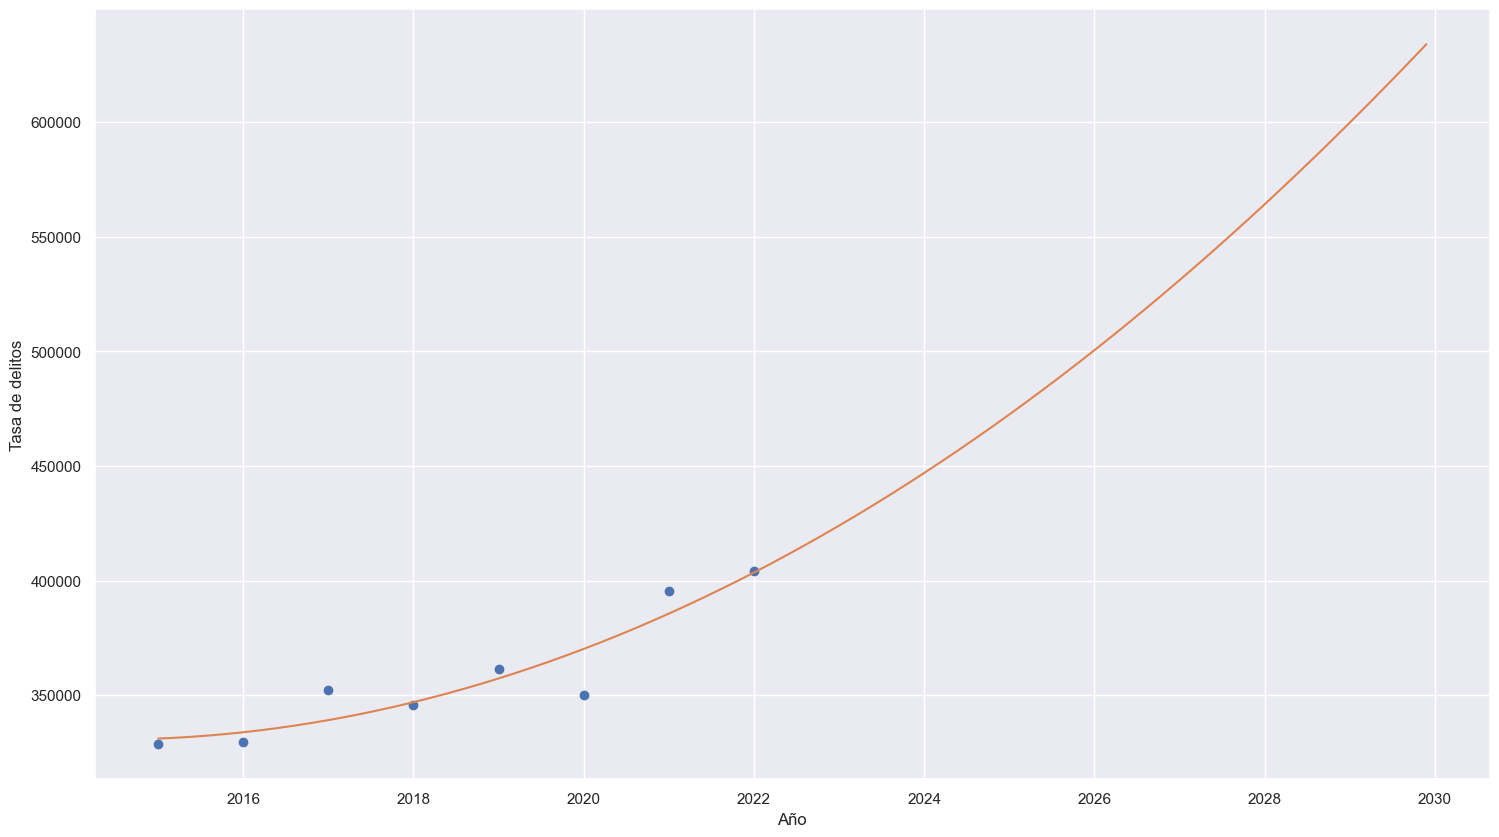

In [45]:
# Graficamos
plt.figure(figsize=(18,10))
plt.plot(X, Y, 'o')
plt.plot(X_pred, Y_pred)
plt.xlabel('Año')
plt.ylabel('Tasa de delitos')
plt.show()


## Conclusiones

En este proyecto se trabajó con un conjunto de datos que contiene información demográfica y de los delitos que se cometen en la Republica Mexicana, con el objetivo de predecir la tasa de delitos del estado con mayor inseguridad que es Mexico. A través de un análisis exploratorio de datos, se identificaron varios factores que influyen los delitos como son la Edad cometiendo mas en Jovenes y Adultos Mayores, el Género afectando mas a Mujeres ademas de esto se frecuentaron mas en los meses de Marzo y Mayo.

Se aplicaron tres modelos de aprendizaje supervisado para predecir la tasa de cremenes a lo largo de los años: Regresión Lineal, Regresión Polinómica y Arbol de desiciones. Después de un análisis de presicion de los modelos, se encontró que el modelo de Regresión Polinómica tuvo el mejor desempeño en términos de precisión de prueba, seguido por Arbol de desición.

En conclusión, el análisis exploratorio de datos y los modelos de aprendizaje supervisado aplicados en este proyecto proporcionan una valiosa herramienta para predecir los delitos a futuro en el Estado de Mexico y de esta manera tomar las medidas que se requerieran.